In [1]:
!pip install langgraph langsmith

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 2.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/2.0 MB 2.8 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/2.0 MB 1.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/2.0 MB 1.7 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 1.6 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ------------------------------- -------- 0.8/1.0 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.5 MB 1.9 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.5 MB 2.1 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.5 MB 2.0 MB/s eta 0:00:01
   --------------------------------- ------ 2.1/2.5 MB 2.1 MB/s eta 0:00:01
   ------------------------------------- -- 2.4/2.5 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5

In [2]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Retrieve API key
groq_api_key = os.getenv("GROQ_API_KEY")

In [4]:
# Retrieve the Landsmith API key
landsmith_api_key = os.getenv("LANDSMITH_API_KEY") 

In [5]:
os.environ["LANGCHAIN_API_KEY"] = landsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [6]:
from langchain_groq import ChatGroq

In [7]:
llm = ChatGroq(groq_api_key = groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000279A1D6A250>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000279A1D78790>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## start building chatbot using langGraph

In [8]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [12]:
graph_builder

In [13]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}

In [15]:
graph_builder.add_node("chatbot",chatbot)

In [16]:
graph_builder

In [17]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [18]:
graph = graph_builder.compile()

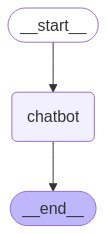

In [19]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [20]:
while True:
    user_input=input("User: ")
    if user_input.lower() in ["quit","q"]:
        print("Good Bye")
        break
    for event in graph.stream({'messages':("user",user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistant:", value["messages"].content)

User:  hello


dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001896358, 'queue_time': 0.01762792, 'total_time': 0.029169085}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-8e62ad1a-7e6c-4c53-8fcf-d331a891fe23-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})}])
content='Hello! 👋  How can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001896358, 'queue_time': 0.01762792, 'total_time': 0.029169085}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-8e62ad1a-7e6c-4c53-8fcf-d33

User:  q


Good Bye
